In [1]:
import pandas as pd

In [2]:
data = pd.read_excel('C:/Users/lenovo/Desktop/py/ML Case study/Womens Clothing Reviews Data.xlsx')
pre_proc=pd.read_csv("C:/Users/lenovo/Desktop/py/ML Case study/preprocessed_data")

In [4]:
data.head()

,Product ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer Age,Review Title,Review Text,Rating,Recommend Flag
0,767,Initmates,Intimate,Intimates,Mumbai,Mobile,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1
1,1080,General,Dresses,Dresses,Bangalore,Mobile,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1
2,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0
3,1049,General Petite,Bottoms,Pants,Chennai,Web,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1
4,847,General,Tops,Blouses,Bangalore,Web,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Product ID      23486 non-null  int64 
 1   Category        23472 non-null  object
 2   Subcategory1    23472 non-null  object
 3   SubCategory2    23472 non-null  object
 4   Location        23486 non-null  object
 5   Channel         23486 non-null  object
 6   Customer Age    23486 non-null  int64 
 7   Review Title    19676 non-null  object
 8   Review Text     22641 non-null  object
 9   Rating          23486 non-null  int64 
 10  Recommend Flag  23486 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 2.0+ MB


In [6]:
# 1. Check for missing data and handle them appropriately (imputation or removal)
# You can use the .isnull() and .fillna() functions to handle missing data.
# In this example, we will fill missing values in the 'Customer Age' column with the mean age.
data['Customer Age'].fillna(data['Customer Age'].mean(), inplace=True)

# 2. Check for duplicates and remove them if necessary
# Use the .duplicated() and .drop_duplicates() functions to identify and remove duplicates.
data.duplicated(subset=['Product ID', 'Review Text'], keep='first')
data.drop_duplicates(subset=['Product ID', 'Review Text'], keep='first', inplace=True)

# 3. Ensure data types are consistent
# Check and convert data types as needed.
# For example, you might want to convert 'Customer Age' to integer if it's currently a float.
data['Customer Age'] = data['Customer Age'].astype(int)

# 4. Convert text data to lowercase for consistency
# Use the .str.lower() function to convert text to lowercase.
data['Review Title'] = data['Review Title'].str.lower()
data['Review Text'] = data['Review Text'].str.lower()

# Save the preprocessed data to a new file if necessary
data.to_csv('preprocessed_data.csv', index=False)

In [7]:
data.columns

Index(['Product ID', 'Category', 'Subcategory1', 'SubCategory2', 'Location',
       'Channel', 'Customer Age', 'Review Title', 'Review Text', 'Rating',
       'Recommend Flag'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22887 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Product ID      22887 non-null  int64 
 1   Category        22873 non-null  object
 2   Subcategory1    22873 non-null  object
 3   SubCategory2    22873 non-null  object
 4   Location        22887 non-null  object
 5   Channel         22887 non-null  object
 6   Customer Age    22887 non-null  int32 
 7   Review Title    19674 non-null  object
 8   Review Text     22639 non-null  object
 9   Rating          22887 non-null  int64 
 10  Recommend Flag  22887 non-null  int64 
dtypes: int32(1), int64(3), object(7)
memory usage: 2.0+ MB


In [9]:
data.head()

,Product ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer Age,Review Title,Review Text,Rating,Recommend Flag
0,767,Initmates,Intimate,Intimates,Mumbai,Mobile,33,NaN,absolutely wonderful - silky and sexy and comf...,4,1
1,1080,General,Dresses,Dresses,Bangalore,Mobile,34,NaN,love this dress! it's sooo pretty. i happene...,5,1
2,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,some major design flaws,i had such high hopes for this dress and reall...,3,0
3,1049,General Petite,Bottoms,Pants,Chennai,Web,50,my favorite buy!,"i love, love, love this jumpsuit. it's fun, fl...",5,1
4,847,General,Tops,Blouses,Bangalore,Web,47,flattering shirt,this shirt is very flattering to all due to th...,5,1


In [10]:
# Check for missing values
missing_data = data.isnull().sum()
print(missing_data)

Product ID           0
Category            14
Subcategory1        14
SubCategory2        14
Location             0
Channel              0
Customer Age         0
Review Title      3213
Review Text        248
Rating               0
Recommend Flag       0
dtype: int64


In [11]:
# Impute missing values in categorical columns with the mode
categorical_columns = ['Category', 'Subcategory1', 'SubCategory2', 'Review Title', 'Review Text']
for column in categorical_columns:
    data[column].fillna("Not Available", inplace=True)

data['Category'].fillna(data['Category'].mode()[0], inplace=True)
data['Subcategory1'].fillna(data['Subcategory1'].mode()[0], inplace=True)
data['SubCategory2'].fillna(data['SubCategory2'].mode()[0], inplace=True)


In [12]:
missing_data = data.isnull().sum()
print(missing_data)

Product ID        0
Category          0
Subcategory1      0
SubCategory2      0
Location          0
Channel           0
Customer Age      0
Review Title      0
Review Text       0
Rating            0
Recommend Flag    0
dtype: int64


In [13]:
duplicates = data.duplicated()
duplicates

0        False
1        False
2        False
3        False
4        False
         ...  
23481    False
23482    False
23483    False
23484    False
23485    False
Length: 22887, dtype: bool

In [14]:
duplicates = data.duplicated(subset=['Product ID', 'Category', 'Review Text'])


In [15]:
duplicates

0        False
1        False
2        False
3        False
4        False
         ...  
23481    False
23482    False
23483    False
23484    False
23485    False
Length: 22887, dtype: bool

In [16]:
df = data.drop_duplicates()

In [17]:
df

,Product ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer Age,Review Title,Review Text,Rating,Recommend Flag
0,767,Initmates,Intimate,Intimates,Mumbai,Mobile,33,Not Available,absolutely wonderful - silky and sexy and comf...,4,1
1,1080,General,Dresses,Dresses,Bangalore,Mobile,34,Not Available,love this dress! it's sooo pretty. i happene...,5,1
2,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,some major design flaws,i had such high hopes for this dress and reall...,3,0
3,1049,General Petite,Bottoms,Pants,Chennai,Web,50,my favorite buy!,"i love, love, love this jumpsuit. it's fun, fl...",5,1
4,847,General,Tops,Blouses,Bangalore,Web,47,flattering shirt,this shirt is very flattering to all due to th...,5,1
...,...,...,...,...,...,...,...,...,...,...,...
23481,1104,General Petite,Dresses,Dresses,Gurgaon,Mobile,34,great dress for many occasions,i was very happy to snag this dress at such a ...,5,1
23482,862,General Petite,Tops,Knits,Gurgaon,Web,48,wish it was made of cotton,"it reminds me of maternity clothes. soft, stre...",3,1
23483,1104,General Petite,Dresses,Dresses,Gurgaon,Web,31,"cute, but see through","this fit well, but the top was very see throug...",3,0
23484,1084,General,Dresses,Dresses,Gurgaon,Web,28,"very cute dress, perfect for summer parties an...",i bought this dress for a wedding i have this ...,3,1


In [18]:
df = data

In [19]:
# Convert 'Customer Age' to int
df['Customer Age'] = df['Customer Age'].astype(int)

In [20]:
# Convert 'Rating' to int or float if needed
df['Rating'] = df['Rating'].astype(int)  # Or df['Rating'] = df['Rating'].astype(float)

# Convert 'Recommend Flag' to int (if it's not already) or bool
df['Recommend Flag'] = df['Recommend Flag'].astype(int)  # Or df['Recommend Flag'] = df['Recommend Flag'].astype(bool)


In [21]:
# Check data types
print(df.dtypes)


Product ID         int64
Category          object
Subcategory1      object
SubCategory2      object
Location          object
Channel           object
Customer Age       int32
Review Title      object
Review Text       object
Rating             int32
Recommend Flag     int32
dtype: object


In [22]:
# Convert 'Review Title' and 'Review Text' to lowercase
df['Review Title'] = df['Review Title'].str.lower()
df['Review Text'] = df['Review Text'].str.lower()

# Exploratory Data Analysis (EDA):

C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


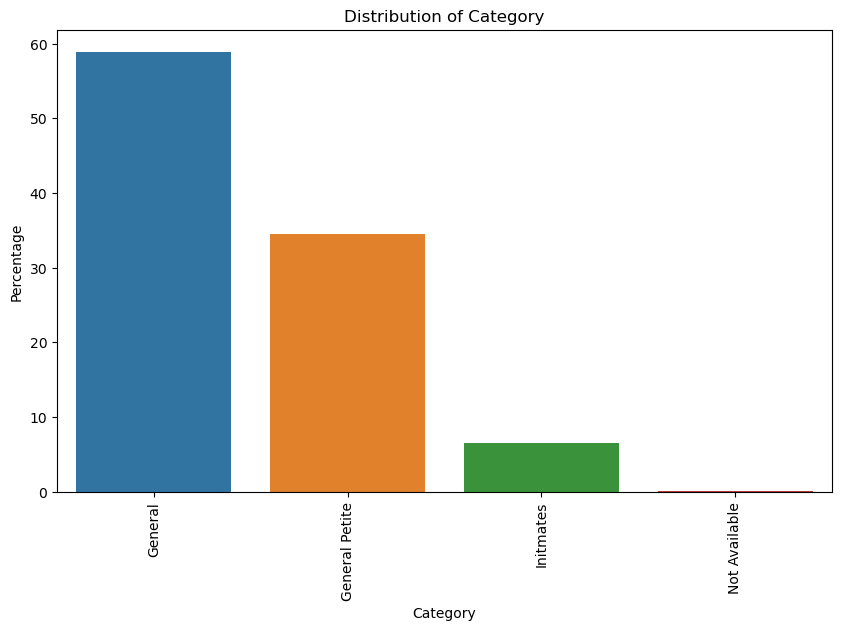

C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


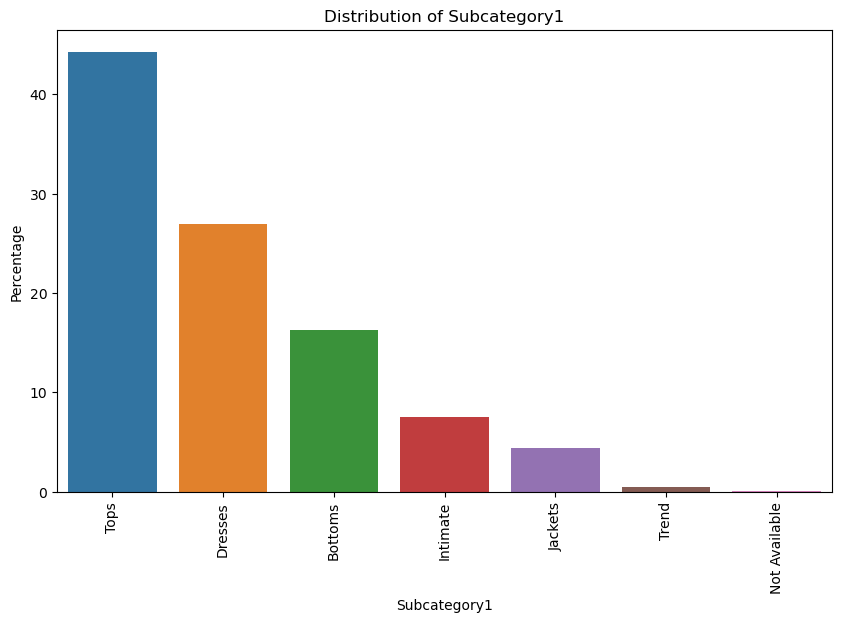

C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


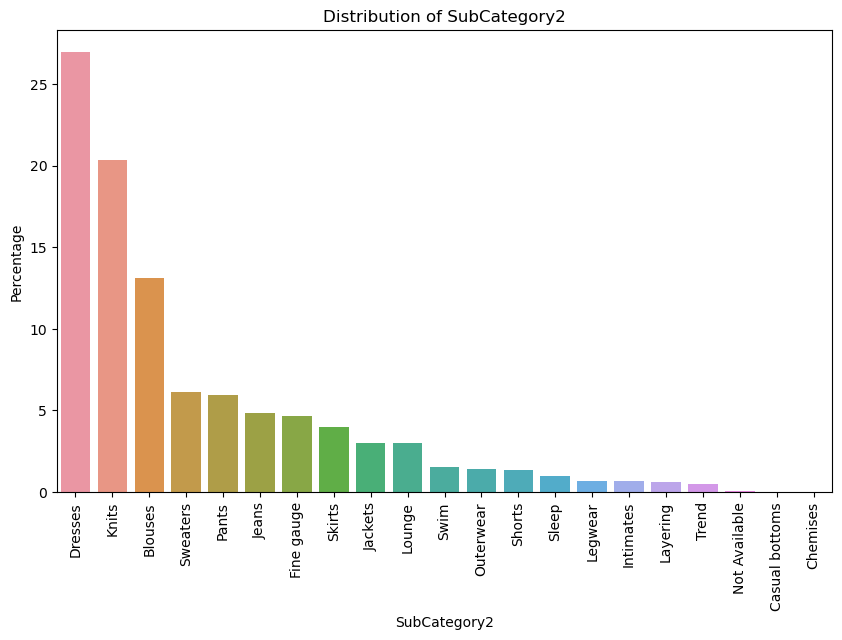

C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


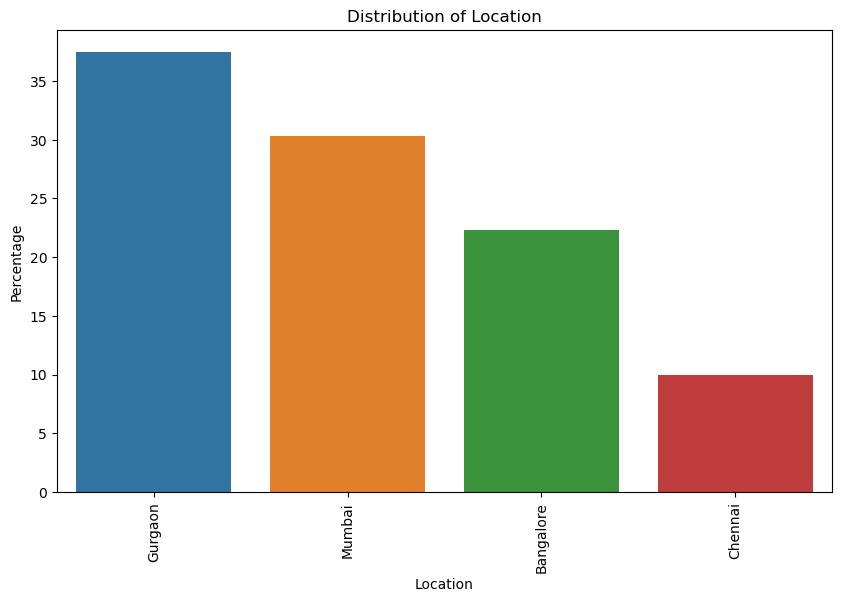

C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


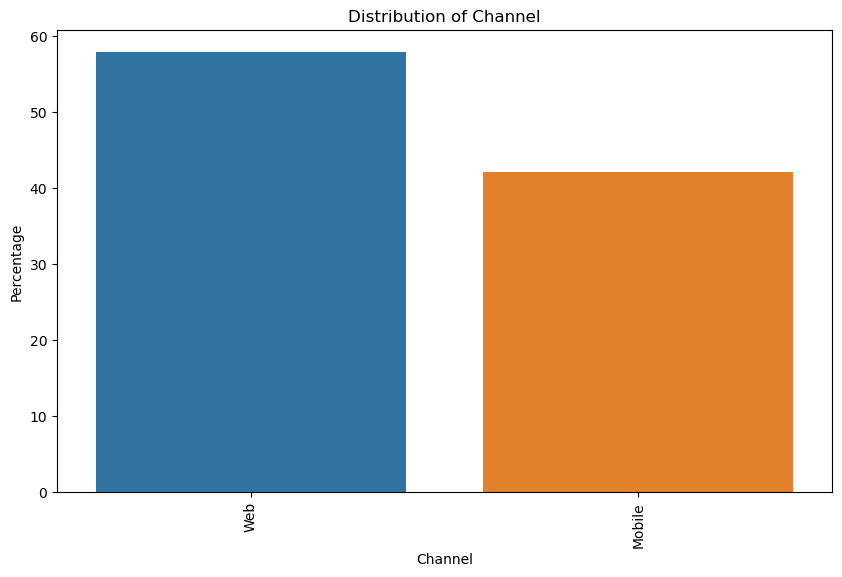

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# List of categorical columns
categorical_columns = ['Category', 'Subcategory1', 'SubCategory2', 'Location', 'Channel']

# Create bar charts and calculate proportions for each categorical variable
for column in categorical_columns:
    # Count the frequency of each category
    category_counts = df[column].value_counts()
    
    # Calculate proportions (percentages)
    category_proportions = category_counts / len(df) * 100
    
    # Plot a bar chart
    plt.figure(figsize=(10, 6))
    sns.barplot(x=category_proportions.index, y=category_proportions.values)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Percentage')
    plt.xticks(rotation=90)  # Rotate x-axis labels for readability
    plt.show()

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have your dataset loaded as 'df'

# Numerical columns of interest
numerical_columns = ['Customer Age', 'Rating']

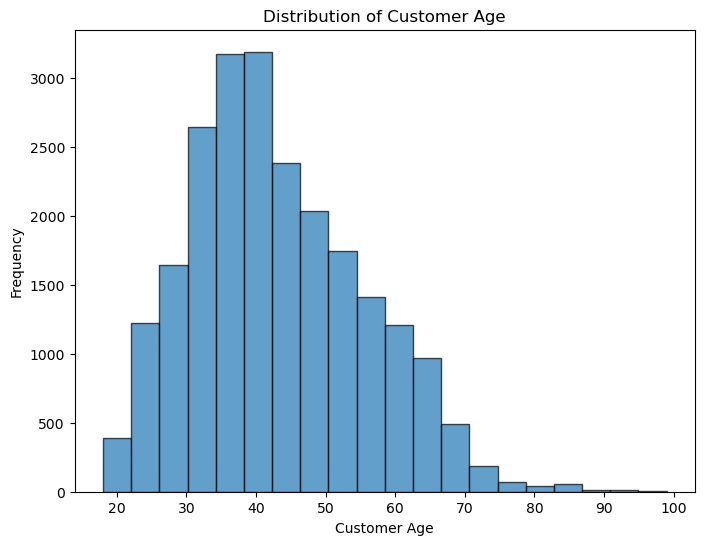

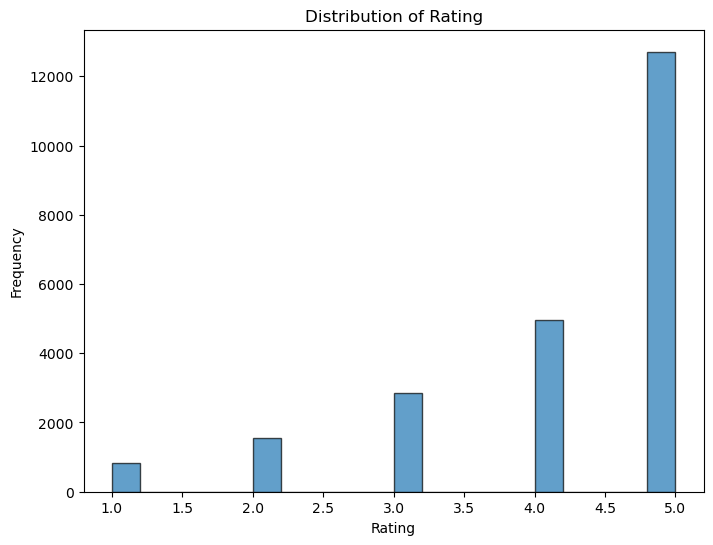

In [25]:
# Create histograms for numerical variables
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    plt.hist(df[column], bins=20, edgecolor='k', alpha=0.7)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


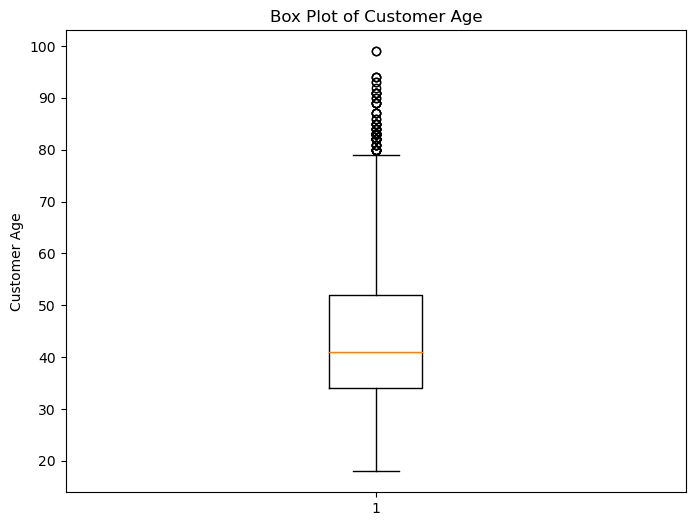

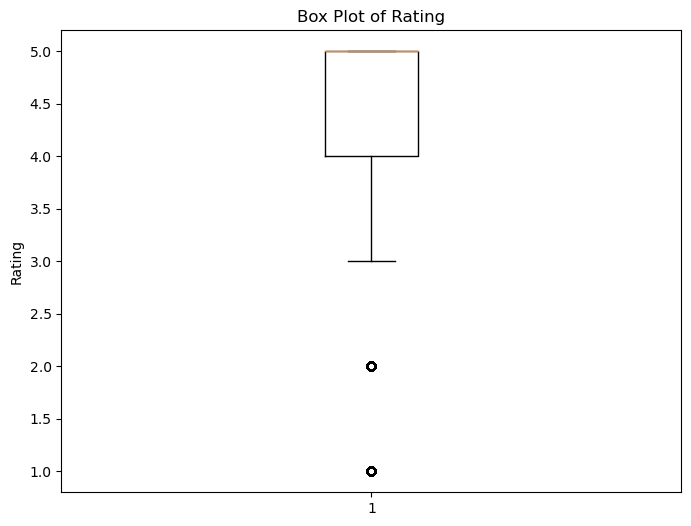

In [26]:
# Use box plots to identify outliers
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    plt.boxplot(df[column])
    plt.title(f'Box Plot of {column}')
    plt.ylabel(column)
    plt.show()

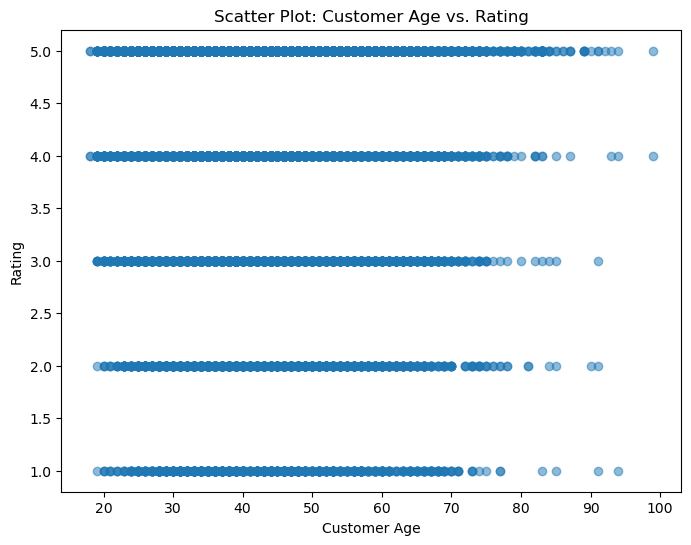

In [27]:
# Explore the relationship between 'Customer Age' and 'Rating'
plt.figure(figsize=(8, 6))
plt.scatter(df['Customer Age'], df['Rating'], alpha=0.5)
plt.title('Scatter Plot: Customer Age vs. Rating')
plt.xlabel('Customer Age')
plt.ylabel('Rating')
plt.show()

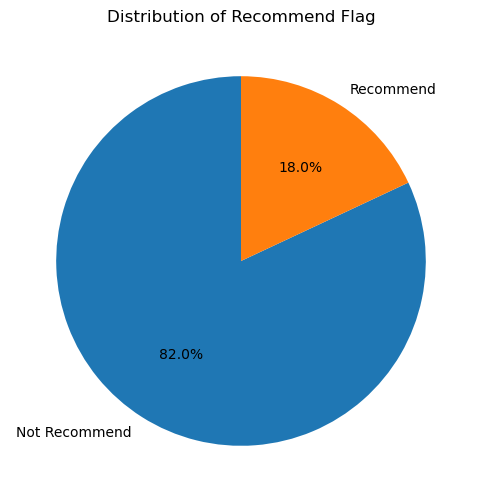

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have your dataset loaded as 'df'

# Create a pie chart for the distribution of 'Recommend Flag'
recommend_counts = df['Recommend Flag'].value_counts()
labels = ['Not Recommend', 'Recommend']
plt.figure(figsize=(8, 6))
plt.pie(recommend_counts, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Recommend Flag')
plt.show()



C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categor

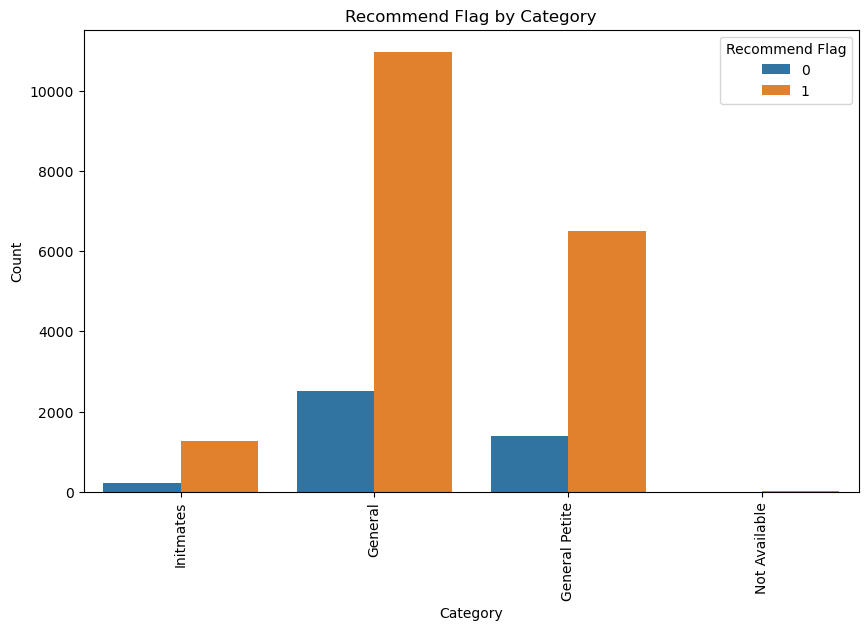

In [29]:
# Explore the relationship between 'Recommend Flag' and 'Category'
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Category', hue='Recommend Flag')
plt.title('Recommend Flag by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


# Text Mining:**

   - Combine Review Title and Review Text into a single text field.

In [30]:
import pandas as pd

# Assuming you have your dataset loaded as 'df'

# Combine 'Review Title' and 'Review Text' into a single text field
df['Combined Review'] = df['Review Title'].fillna('') + ' ' + df['Review Text'].fillna('')

# You can choose to fill any potential missing values in 'Review Title' or 'Review Text' with empty strings ('').

# Display the DataFrame with the new column
print(df[['Review Title', 'Review Text', 'Combined Review']])


                                            Review Title  \
0                                          not available   
1                                          not available   
2                                some major design flaws   
3                                       my favorite buy!   
4                                       flattering shirt   
...                                                  ...   
23481                     great dress for many occasions   
23482                         wish it was made of cotton   
23483                              cute, but see through   
23484  very cute dress, perfect for summer parties an...   
23485                    please make more like this one!   

                                             Review Text  \
0      absolutely wonderful - silky and sexy and comf...   
1      love this dress!  it's sooo pretty.  i happene...   
2      i had such high hopes for this dress and reall...   
3      i love, love, love this jumpsuit

- Tokenization: Split text into words or phrases.

In [31]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize

In [32]:
# Download NLTK data (word tokenizer)
nltk.download('punkt')

# Tokenize the 'Combined Review' column
df['Tokens'] = df['Combined Review'].apply(word_tokenize)




[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [33]:
# Display the DataFrame with the 'Tokens' column
print(df[['Combined Review', 'Tokens']])

                                         Combined Review  \
0      not available absolutely wonderful - silky and...   
1      not available love this dress!  it's sooo pret...   
2      some major design flaws i had such high hopes ...   
3      my favorite buy! i love, love, love this jumps...   
4      flattering shirt this shirt is very flattering...   
...                                                  ...   
23481  great dress for many occasions i was very happ...   
23482  wish it was made of cotton it reminds me of ma...   
23483  cute, but see through this fit well, but the t...   
23484  very cute dress, perfect for summer parties an...   
23485  please make more like this one! this dress in ...   

                                                  Tokens  
0      [not, available, absolutely, wonderful, -, sil...  
1      [not, available, love, this, dress, !, it, 's,...  
2      [some, major, design, flaws, i, had, such, hig...  
3      [my, favorite, buy, !, i, love, ,, l

In [34]:
from nltk.corpus import stopwords

In [35]:
# Download NLTK stop words
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [36]:
# Define a set of stop words
stop_words = set(stopwords.words('english'))

In [37]:
# Function to remove stop words from a list of tokens
def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]


In [38]:
# Apply the remove_stopwords function to the 'Tokens' column
df['Tokens'] = df['Tokens'].apply(remove_stopwords)


In [39]:
# Display the DataFrame with stop words removed
print(df['Tokens'])


0        [available, absolutely, wonderful, -, silky, s...
1        [available, love, dress, !, 's, sooo, pretty, ...
2        [major, design, flaws, high, hopes, dress, rea...
3        [favorite, buy, !, love, ,, love, ,, love, jum...
4        [flattering, shirt, shirt, flattering, due, ad...
                               ...                        
23481    [great, dress, many, occasions, happy, snag, d...
23482    [wish, made, cotton, reminds, maternity, cloth...
23483    [cute, ,, see, fit, well, ,, top, see, ., neve...
23484    [cute, dress, ,, perfect, summer, parties, bou...
23485    [please, make, like, one, !, dress, lovely, pl...
Name: Tokens, Length: 22887, dtype: object


# Stemming (using NLTK's Porter Stemmer):

In [40]:
from nltk.stem import PorterStemmer

In [41]:
# Initialize the Porter Stemmer
stemmer = PorterStemmer()

In [42]:
# Function to perform stemming on a list of tokens
def stem_tokens(tokens):
    return [stemmer.stem(word) for word in tokens]

In [43]:
# Apply stemming to the 'Tokens' column
df['Stemmed Tokens'] = df['Tokens'].apply(stem_tokens)

In [44]:
# Display the DataFrame with stemmed tokens
print(df[['Tokens', 'Stemmed Tokens']])

                                                  Tokens  \
0      [available, absolutely, wonderful, -, silky, s...   
1      [available, love, dress, !, 's, sooo, pretty, ...   
2      [major, design, flaws, high, hopes, dress, rea...   
3      [favorite, buy, !, love, ,, love, ,, love, jum...   
4      [flattering, shirt, shirt, flattering, due, ad...   
...                                                  ...   
23481  [great, dress, many, occasions, happy, snag, d...   
23482  [wish, made, cotton, reminds, maternity, cloth...   
23483  [cute, ,, see, fit, well, ,, top, see, ., neve...   
23484  [cute, dress, ,, perfect, summer, parties, bou...   
23485  [please, make, like, one, !, dress, lovely, pl...   

                                          Stemmed Tokens  
0      [avail, absolut, wonder, -, silki, sexi, comfort]  
1      [avail, love, dress, !, 's, sooo, pretti, ., h...  
2      [major, design, flaw, high, hope, dress, reall...  
3      [favorit, buy, !, love, ,, love, ,, 

# Lemmatization (using NLTK's WordNet Lemmatizer):

In [45]:
import nltk

from nltk.stem import WordNetLemmatizer

In [46]:
# Download NLTK WordNet data
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [47]:
# Initialize the WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()

In [48]:
# Function to perform lemmatization on a list of tokens
def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(word) for word in tokens]

In [49]:
# Apply lemmatization to the 'Tokens' column
df['Lemmatized Tokens'] = df['Tokens'].apply(lemmatize_tokens)

In [50]:
# Display the DataFrame with lemmatized tokens
print(df[['Tokens', 'Lemmatized Tokens']])

                                                  Tokens  \
0      [available, absolutely, wonderful, -, silky, s...   
1      [available, love, dress, !, 's, sooo, pretty, ...   
2      [major, design, flaws, high, hopes, dress, rea...   
3      [favorite, buy, !, love, ,, love, ,, love, jum...   
4      [flattering, shirt, shirt, flattering, due, ad...   
...                                                  ...   
23481  [great, dress, many, occasions, happy, snag, d...   
23482  [wish, made, cotton, reminds, maternity, cloth...   
23483  [cute, ,, see, fit, well, ,, top, see, ., neve...   
23484  [cute, dress, ,, perfect, summer, parties, bou...   
23485  [please, make, like, one, !, dress, lovely, pl...   

                                       Lemmatized Tokens  
0      [available, absolutely, wonderful, -, silky, s...  
1      [available, love, dress, !, 's, sooo, pretty, ...  
2      [major, design, flaw, high, hope, dress, reall...  
3      [favorite, buy, !, love, ,, love, ,,

In [51]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt



In [52]:
# Assuming you have your dataset loaded as 'df'

# Define a function to count word frequency in a list of tokens
def word_frequency(tokens):
    word_count = Counter(tokens)
    return word_count

In [53]:
# Categorize reviews as positive (e.g., Rating >= 4 or Recommend Flag == 1) and negative
positive_reviews = df[df['Rating'] >= 4]  # You can choose the criteria you prefer
negative_reviews = df[df['Rating'] < 4]  # You can choose the criteria you prefer

In [54]:
# Tokenize the reviews
positive_tokens = [token for tokens in positive_reviews['Lemmatized Tokens'] for token in tokens]
negative_tokens = [token for tokens in negative_reviews['Lemmatized Tokens'] for token in tokens]

In [55]:
# Calculate word frequency in positive and negative reviews
positive_word_count = word_frequency(positive_tokens)
negative_word_count = word_frequency(negative_tokens)

In [56]:
# Get the most frequent words (e.g., top 10)
top_positive_words = positive_word_count.most_common(10)
top_negative_words = negative_word_count.most_common(10)

In [57]:
top_positive_words

[('.', 67072),
 (',', 37452),
 ('!', 17360),
 ('dress', 10137),
 ('love', 9465),
 ('fit', 8570),
 ('size', 7660),
 ('top', 7183),
 ('great', 7022),
 ("'s", 6252)]

In [58]:
top_negative_words

[('.', 21336),
 (',', 12772),
 ('dress', 2848),
 ("n't", 2575),
 ('like', 2295),
 ('top', 2256),
 ('fit', 2220),
 ('!', 2126),
 ('look', 2018),
 ('size', 1914)]

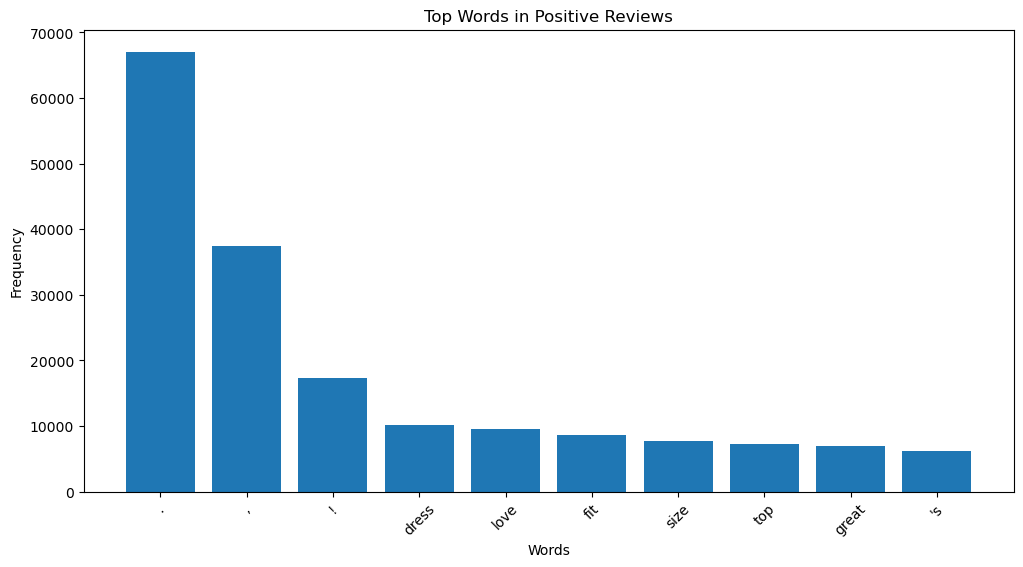

In [59]:
# Plot word frequency for positive reviews
plt.figure(figsize=(12, 6))
plt.bar(*zip(*top_positive_words))
plt.title('Top Words in Positive Reviews')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

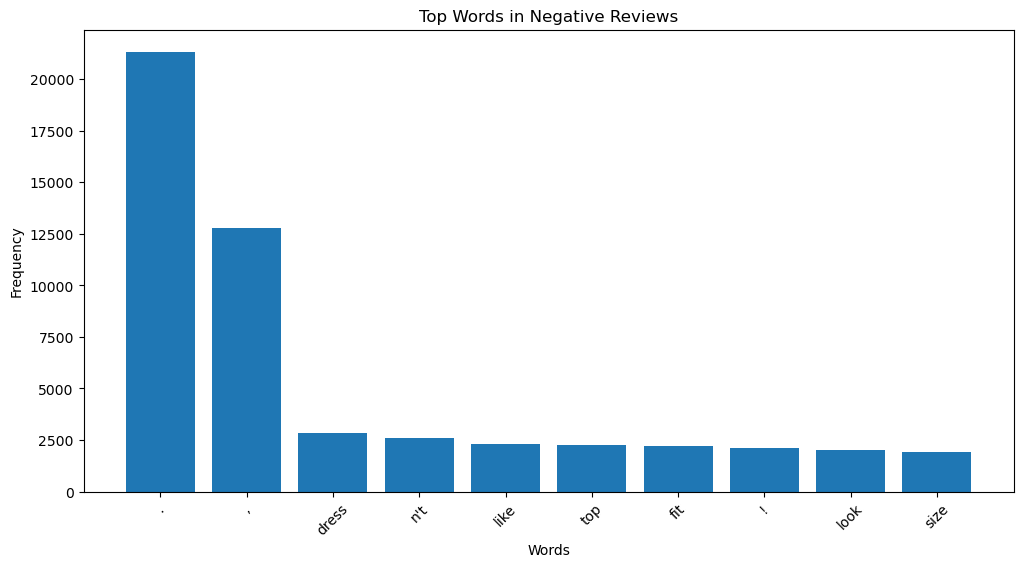

In [60]:
# Plot word frequency for negative reviews
plt.figure(figsize=(12, 6))
plt.bar(*zip(*top_negative_words))
plt.title('Top Words in Negative Reviews')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

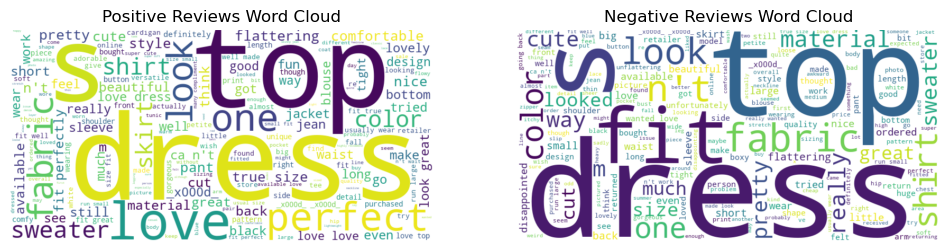

In [61]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming you have already categorized reviews as positive and negative
positive_reviews = df[df['Rating'] >= 4]  # You can choose the criteria you prefer
negative_reviews = df[df['Rating'] < 4]  # You can choose the criteria you prefer

# Join tokens into a single string for positive and negative reviews
positive_text = ' '.join(' '.join(tokens) for tokens in positive_reviews['Lemmatized Tokens'])
negative_text = ' '.join(' '.join(tokens) for tokens in negative_reviews['Lemmatized Tokens'])

# Create word clouds for positive and negative reviews
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

# Plot the word clouds
plt.figure(figsize=(12, 6))

plt.subplot(121)  # Subplot for positive word cloud
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive Reviews Word Cloud')
plt.axis('off')

plt.subplot(122)  # Subplot for negative word cloud
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negative Reviews Word Cloud')
plt.axis('off')

plt.show()


#  Conduct sentiment analysis using pre-trained models or libraries like VADER or TextBlob.

In [62]:
from textblob import TextBlob
import nltk
nltk.download('vader_lexicon')  # Download the VADER lexicon
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [63]:
# Define a function to analyze sentiment using TextBlob
def analyze_sentiment_textblob(text):
    analysis = TextBlob(text)
    # Classify sentiment as positive, negative, or neutral
    if analysis.sentiment.polarity > 0:
        return "Positive"
    elif analysis.sentiment.polarity < 0:
        return "Negative"
    else:
        return "Neutral"


In [64]:
df['Sentiment_TextBlob'] = df['Combined Review'].apply(analyze_sentiment_textblob)


In [65]:
# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Define a function to analyze sentiment using VADER
def analyze_sentiment_vader(text):
    sentiment_scores = analyzer.polarity_scores(text)
    compound_score = sentiment_scores['compound']
    
    # Classify sentiment as positive, negative, or neutral based on the compound score
    if compound_score >= 0.05:
        return "Positive"
    elif compound_score <= -0.05:
        return "Negative"
    else:
        return "Neutral"


In [66]:
df['Sentiment_VADER'] = df['Combined Review'].apply(analyze_sentiment_vader)


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22887 entries, 0 to 23485
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Product ID          22887 non-null  int64 
 1   Category            22887 non-null  object
 2   Subcategory1        22887 non-null  object
 3   SubCategory2        22887 non-null  object
 4   Location            22887 non-null  object
 5   Channel             22887 non-null  object
 6   Customer Age        22887 non-null  int32 
 7   Review Title        22887 non-null  object
 8   Review Text         22887 non-null  object
 9   Rating              22887 non-null  int32 
 10  Recommend Flag      22887 non-null  int32 
 11  Combined Review     22887 non-null  object
 12  Tokens              22887 non-null  object
 13  Stemmed Tokens      22887 non-null  object
 14  Lemmatized Tokens   22887 non-null  object
 15  Sentiment_TextBlob  22887 non-null  object
 16  Sentiment_VADER     22887 n

# Sentiment Analysis:**
   


- Compute sentiment scores for each review.

In [68]:
from textblob import TextBlob

# Define a function to get sentiment scores using TextBlob
def get_textblob_sentiment(text):
    analysis = TextBlob(text)
    # Return the sentiment polarity score
    return analysis.sentiment.polarity

# Apply the function to your DataFrame
df['Sentiment_TextBlob'] = df['Combined Review'].apply(get_textblob_sentiment)


Sentiment analysis, also known as opinion mining, is the process of determining the sentiment or emotional tone expressed in a piece of text, such as a review, tweet, or article. Sentiment analysis can help identify whether the sentiment in the text is positive, negative, or neutral, and sometimes even quantify the sentiment on a numerical scale.

VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool designed for text written in English. It is widely used for sentiment analysis in social media, customer reviews, and other text data. VADER analyzes text to determine the emotional tone conveyed by words and phrases, and it assigns a polarity score to each piece of text.

Here's how VADER sentiment analysis works:

Lexicon-Based Analysis: VADER relies on a predefined lexicon (dictionary) of words and phrases. Each word in the lexicon is assigned a polarity score, indicating how positive or negative the word is. The lexicon also contains words and phrases that convey neutrality, intensity, and other sentiment-related features.

Rule-Based Scoring: VADER uses rules to interpret the sentiment of text, taking into account the context and positioning of words in a sentence. It looks for patterns, intensifiers, negations, and other linguistic features to refine the sentiment analysis.

Polarity Score: For each piece of text, VADER calculates a compound polarity score that summarizes the overall sentiment. The score typically ranges from -1 (most negative) to 1 (most positive), with 0 indicating a neutral sentiment. This compound score provides a quantitative measure of sentiment.

Sentiment Classification: VADER classifies text into categories like positive, negative, or neutral based on the polarity score. The thresholds for classification can be adjusted to suit the specific analysis.

Sentiment Intensity: VADER can also provide an indication of sentiment intensity, helping differentiate between weak and strong sentiments.

VADER is especially useful for sentiment analysis in short text data, such as tweets or customer reviews, as it considers the context and semantics of text. It's a valuable tool for businesses, researchers, and organizations looking to gauge public sentiment in various forms of textual data.

To use VADER for sentiment analysis in Python, you can employ the NLTK library, the TextBlob library, or the VADERSentiment library, among others, depending on your preferences and requirements.

In [69]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Define a function to get sentiment scores using VADER
def get_vader_sentiment(text):
    sentiment_scores = analyzer.polarity_scores(text)
    # Return the compound sentiment score (ranges from -1 to 1)
    return sentiment_scores['compound']

# Apply the function to your DataFrame
df['Sentiment_VADER'] = df['Combined Review'].apply(get_vader_sentiment)


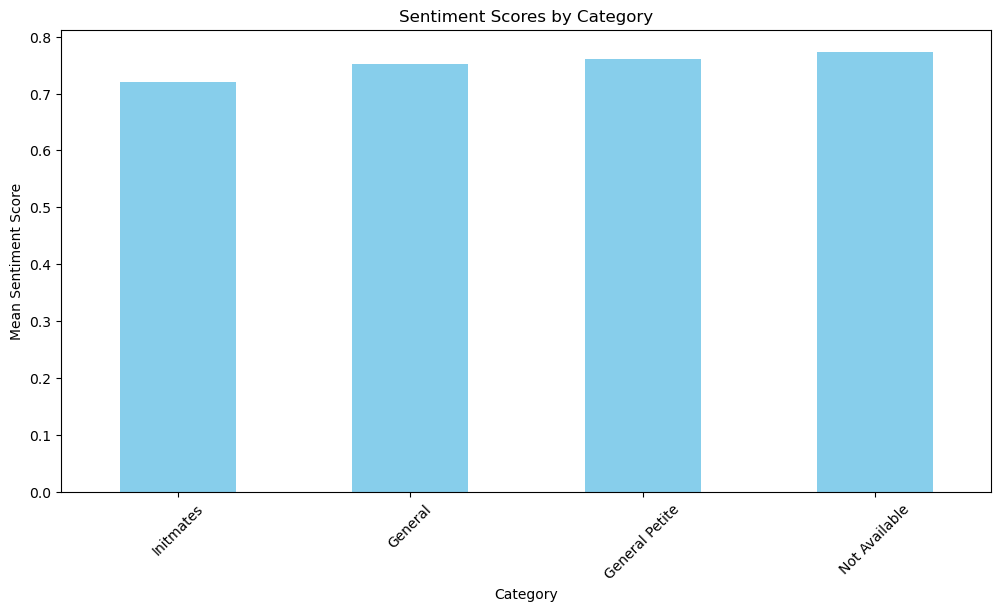

In [70]:
import matplotlib.pyplot as plt

# Group by Category and calculate mean sentiment score
category_sentiment = df.groupby('Category')['Sentiment_VADER'].mean()

# Plot sentiment scores by category using a bar plot
plt.figure(figsize=(12, 6))
category_sentiment.sort_values().plot(kind='bar', color='skyblue')
plt.title('Sentiment Scores by Category')
plt.xlabel('Category')
plt.ylabel('Mean Sentiment Score')
plt.xticks(rotation=45)
plt.show()


C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


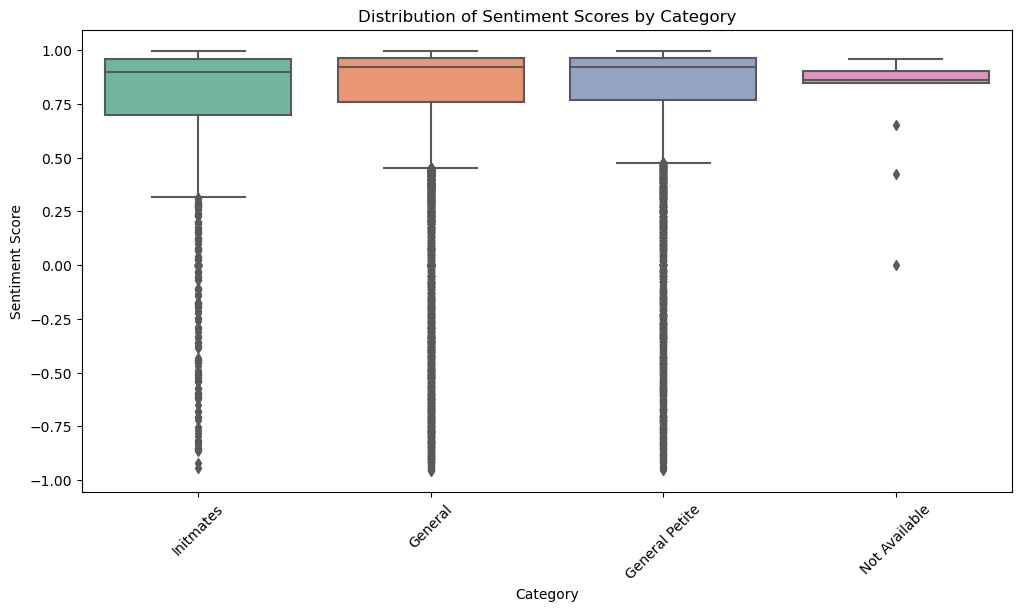

In [71]:
import seaborn as sns

# Create a box plot to visualize the distribution of sentiment scores by category
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Category', y='Sentiment_VADER', palette='Set2')
plt.title('Distribution of Sentiment Scores by Category')
plt.xlabel('Category')
plt.ylabel('Sentiment Score')
plt.xticks(rotation=45)
plt.show()


C:\Users\Asus\AppData\Local\Temp\ipykernel_9564\1861200878.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_sentiment = df.groupby('Age Group')['Sentiment_TextBlob'].mean().reset_index()
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype

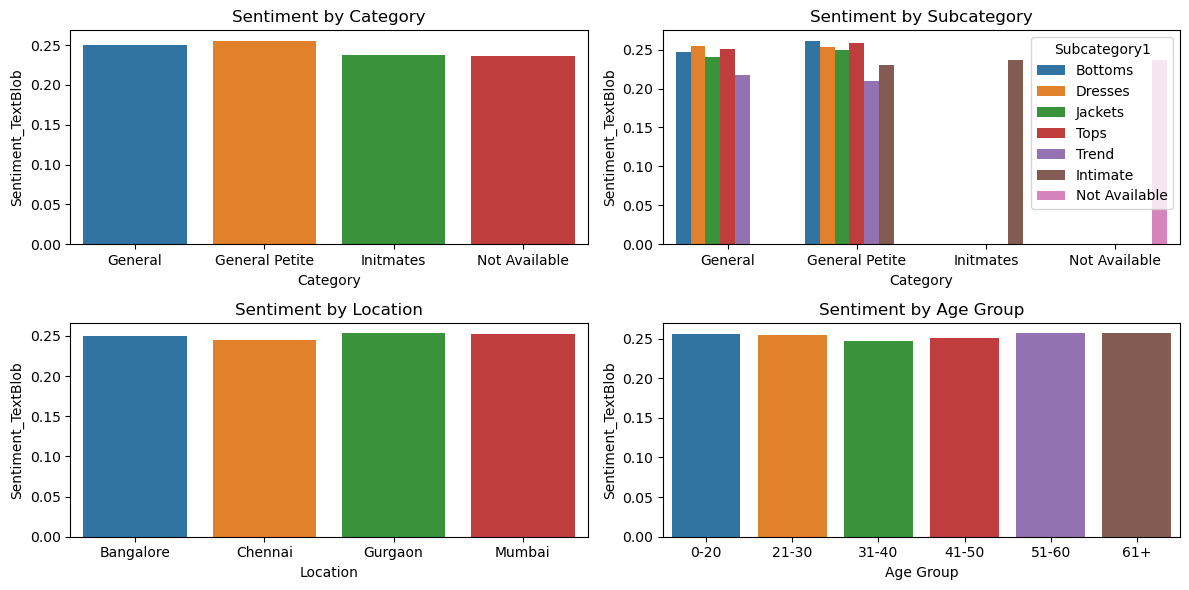

In [72]:

# 1. Aggregate sentiment scores by category
category_sentiment = df.groupby('Category')['Sentiment_TextBlob'].mean().reset_index()

# 2. Aggregate sentiment scores by subcategories
subcategory_sentiment = df.groupby(['Category', 'Subcategory1'])['Sentiment_TextBlob'].mean().reset_index()

# 3. Aggregate sentiment scores by location
location_sentiment = df.groupby('Location')['Sentiment_TextBlob'].mean().reset_index()

# 4. Aggregate sentiment scores by age group
# Define age groups or bins
age_bins = [0, 20, 30, 40, 50, 60, 100]
age_labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61+']
df['Age Group'] = pd.cut(df['Customer Age'], bins=age_bins, labels=age_labels)

age_sentiment = df.groupby('Age Group')['Sentiment_TextBlob'].mean().reset_index()

# 5. Visualize sentiment scores
plt.figure(figsize=(12, 6))

plt.subplot(221)
sns.barplot(x='Category', y='Sentiment_TextBlob', data=category_sentiment)
plt.title('Sentiment by Category')

plt.subplot(222)
sns.barplot(x='Category', y='Sentiment_TextBlob', hue='Subcategory1', data=subcategory_sentiment)
plt.title('Sentiment by Subcategory')

plt.subplot(223)
sns.barplot(x='Location', y='Sentiment_TextBlob', data=location_sentiment)
plt.title('Sentiment by Location')

plt.subplot(224)
sns.barplot(x='Age Group', y='Sentiment_TextBlob', data=age_sentiment)
plt.title('Sentiment by Age Group')

plt.tight_layout()
plt.show()


# Aggregate and analyze sentiment scores by category, subcategories, products, location, and age group.

In [73]:
# Group by Category and calculate mean sentiment score
category_sentiment = df.groupby('Category')['Sentiment_VADER'].mean()

# Group by Subcategory1 and calculate mean sentiment score
subcategory1_sentiment = df.groupby('Subcategory1')['Sentiment_VADER'].mean()

# Group by SubCategory2 and calculate mean sentiment score
subcategory2_sentiment = df.groupby('SubCategory2')['Sentiment_VADER'].mean()

# Group by Location and calculate mean sentiment score
location_sentiment = df.groupby('Location')['Sentiment_VADER'].mean()

# Group by Customer Age and calculate mean sentiment score
age_group_sentiment = df.groupby('Customer Age')['Sentiment_VADER'].mean()


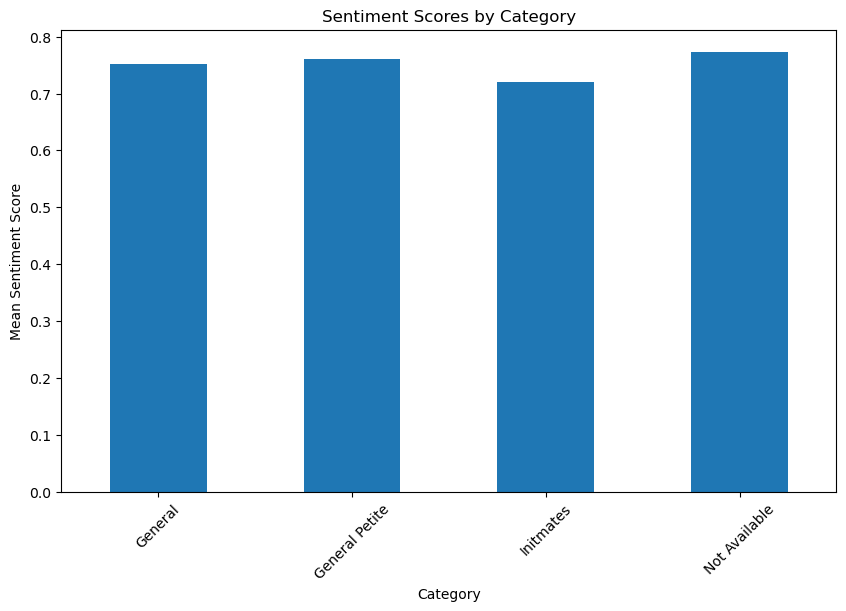

In [74]:
import matplotlib.pyplot as plt

# Plot sentiment scores by category
plt.figure(figsize=(10, 6))
category_sentiment.plot(kind='bar')
plt.title('Sentiment Scores by Category')
plt.xlabel('Category')
plt.ylabel('Mean Sentiment Score')
plt.xticks(rotation=45)
plt.show()


C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


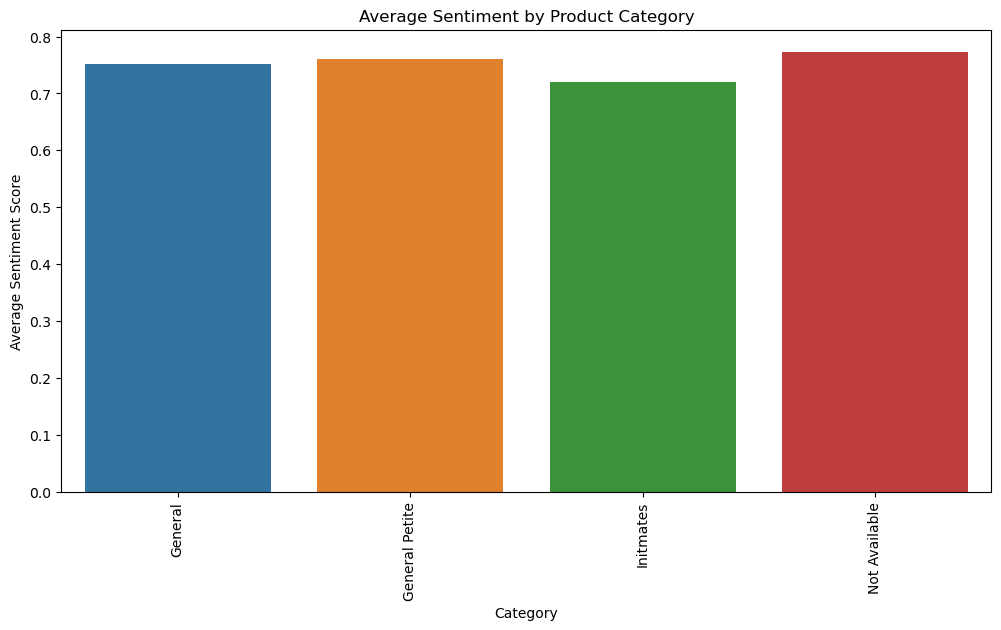

In [75]:
# Analyze sentiment scores by product categories
category_sentiment = df.groupby('Category')['Sentiment_VADER'].mean()
plt.figure(figsize=(12, 6))
sns.barplot(x=category_sentiment.index, y=category_sentiment.values)
plt.xticks(rotation=90)
plt.title('Average Sentiment by Product Category')
plt.xlabel('Category')
plt.ylabel('Average Sentiment Score')
plt.show()


C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


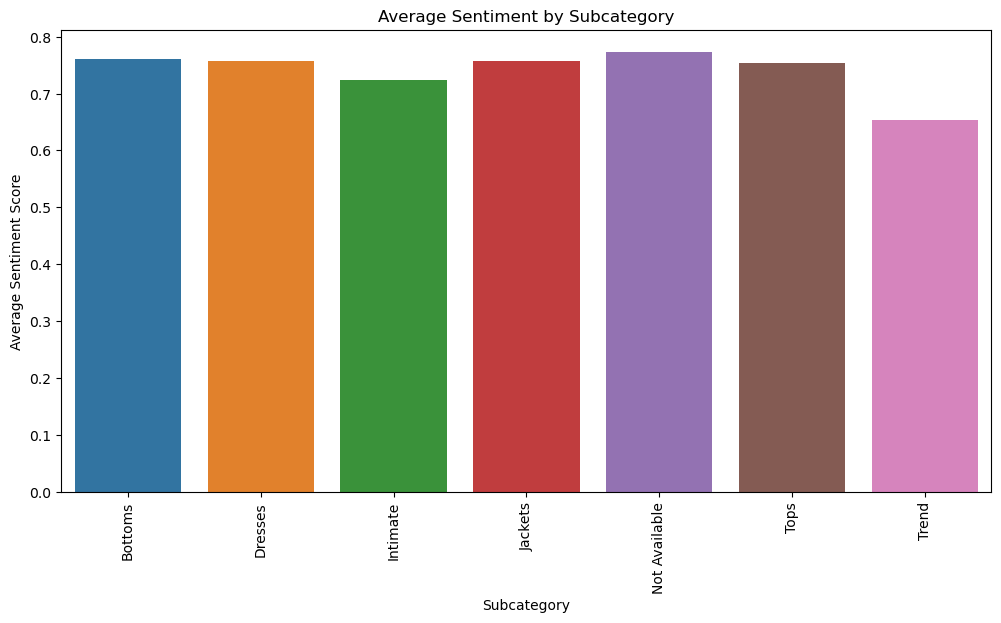

In [76]:
# Analyze sentiment scores by subcategories
subcategory_sentiment = df.groupby('Subcategory1')['Sentiment_VADER'].mean()
plt.figure(figsize=(12, 6))
sns.barplot(x=subcategory_sentiment.index, y=subcategory_sentiment.values)
plt.xticks(rotation=90)
plt.title('Average Sentiment by Subcategory')
plt.xlabel('Subcategory')
plt.ylabel('Average Sentiment Score')
plt.show()

C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


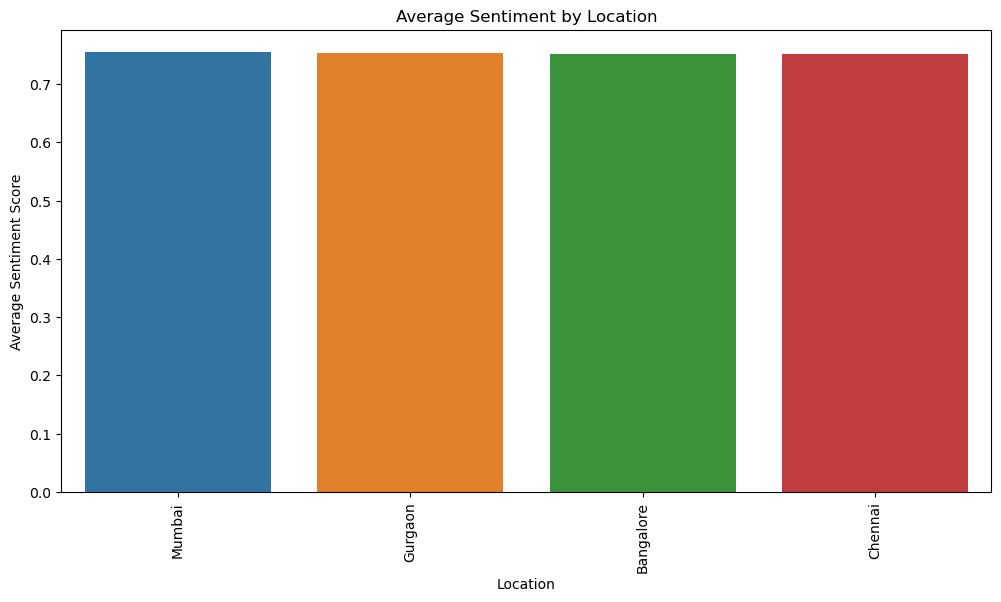

In [77]:
# Analyze sentiment scores by location
location_sentiment = df.groupby('Location')['Sentiment_VADER'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=location_sentiment.index, y=location_sentiment.values)
plt.xticks(rotation=90)
plt.title('Average Sentiment by Location')
plt.xlabel('Location')
plt.ylabel('Average Sentiment Score')
plt.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_9564\155788655.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_sentiment = df.groupby('Age Group')['Sentiment_VADER'].mean()
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


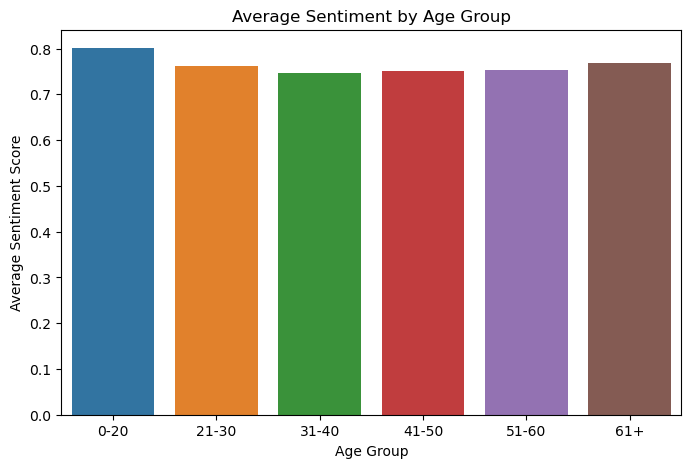

In [78]:
# Analyze sentiment scores by age group
age_group_sentiment = df.groupby('Age Group')['Sentiment_VADER'].mean()
plt.figure(figsize=(8, 5))
sns.barplot(x=age_group_sentiment.index, y=age_group_sentiment.values)
plt.title('Average Sentiment by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Sentiment Score')
plt.show()

In [79]:
correlation = df[['Customer Age', 'Sentiment_VADER']].corr()
print(correlation)


                 Customer Age  Sentiment_VADER
Customer Age         1.000000         0.002767
Sentiment_VADER      0.002767         1.000000


In [80]:
extreme_positive = df[df['Sentiment_VADER'] > 0.8]


In [81]:
extreme_positive.head()

,Product ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer Age,Review Title,Review Text,Rating,Recommend Flag,Combined Review,Tokens,Stemmed Tokens,Lemmatized Tokens,Sentiment_TextBlob,Sentiment_VADER,Age Group
1,1080,General,Dresses,Dresses,Bangalore,Mobile,34,not available,love this dress! it's sooo pretty. i happene...,5,1,not available love this dress! it's sooo pret...,"[available, love, dress, !, 's, sooo, pretty, ...","[avail, love, dress, !, 's, sooo, pretti, ., h...","[available, love, dress, !, 's, sooo, pretty, ...",0.262500,0.9405,31-40
2,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,some major design flaws,i had such high hopes for this dress and reall...,3,0,some major design flaws i had such high hopes ...,"[major, design, flaws, high, hopes, dress, rea...","[major, design, flaw, high, hope, dress, reall...","[major, design, flaw, high, hope, dress, reall...",0.073209,0.9208,51-60
4,847,General,Tops,Blouses,Bangalore,Web,47,flattering shirt,this shirt is very flattering to all due to th...,5,1,flattering shirt this shirt is very flattering...,"[flattering, shirt, shirt, flattering, due, ad...","[flatter, shirt, shirt, flatter, due, adjust, ...","[flattering, shirt, shirt, flattering, due, ad...",0.512891,0.9436,41-50
5,1080,General,Dresses,Dresses,Gurgaon,Web,49,not for the very petite,"i love tracy reese dresses, but this one is no...",2,0,not for the very petite i love tracy reese dre...,"[petite, love, tracy, reese, dresses, ,, one, ...","[petit, love, traci, rees, dress, ,, one, peti...","[petite, love, tracy, reese, dress, ,, one, pe...",0.181111,0.9431,41-50
6,858,General Petite,Tops,Knits,Gurgaon,Mobile,39,cagrcoal shimmer fun,i aded this in my basket at hte last mintue to...,5,1,cagrcoal shimmer fun i aded this in my basket ...,"[cagrcoal, shimmer, fun, aded, basket, hte, la...","[cagrcoal, shimmer, fun, ade, basket, hte, las...","[cagrcoal, shimmer, fun, aded, basket, hte, la...",0.157500,0.8347,31-40


# Reading Customer Reviews from Extreme Sentiment Groups:

You've already filtered extreme positive reviews. You can do the same for extreme negative reviews:

In [82]:
extreme_negative = df[df['Sentiment_VADER'] < -0.8]


In [83]:
extreme_negative.head()

,Product ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer Age,Review Title,Review Text,Rating,Recommend Flag,Combined Review,Tokens,Stemmed Tokens,Lemmatized Tokens,Sentiment_TextBlob,Sentiment_VADER,Age Group
588,875,General,Tops,Knits,Mumbai,Web,46,awkward style,fits very strange. odd cut. does not look well...,2,0,awkward style fits very strange. odd cut. does...,"[awkward, style, fits, strange, ., odd, cut, ....","[awkward, style, fit, strang, ., odd, cut, ., ...","[awkward, style, fit, strange, ., odd, cut, .,...",-0.277222,-0.8151,41-50
692,1110,General Petite,Dresses,Dresses,Gurgaon,Mobile,23,the worst,"i don't typically write bad reviews, but this ...",1,0,"the worst i don't typically write bad reviews,...","[worst, n't, typically, write, bad, reviews, ,...","[worst, n't, typic, write, bad, review, ,, dre...","[worst, n't, typically, write, bad, review, ,,...",-0.308791,-0.8284,21-30
782,945,General,Tops,Sweaters,Mumbai,Web,53,ordinary for the price,i was so excited to order this sweater but was...,1,0,ordinary for the price i was so excited to ord...,"[ordinary, price, excited, order, sweater, dis...","[ordinari, price, excit, order, sweater, disap...","[ordinary, price, excited, order, sweater, dis...",-0.179422,-0.8036,51-60
1163,1060,General Petite,Bottoms,Pants,Mumbai,Web,48,loved but both in my store had quality issues,i really wanted this. they had two size small ...,4,0,loved but both in my store had quality issues ...,"[loved, store, quality, issues, really, wanted...","[love, store, qualiti, issu, realli, want, ., ...","[loved, store, quality, issue, really, wanted,...",-0.145000,-0.8734,41-50
1341,1098,General,Dresses,Dresses,Mumbai,Web,37,disappointed,i'm so incredibly disappointed. the dress is b...,1,0,disappointed i'm so incredibly disappointed. t...,"[disappointed, 'm, incredibly, disappointed, ....","[disappoint, 'm, incred, disappoint, ., dress,...","[disappointed, 'm, incredibly, disappointed, ....",-0.208333,-0.8856,31-40


# Comparative Analysis:

You mentioned using different sentiment analysis methods. If you have sentiment scores from different methods, you can compare them:

In [84]:
df.columns

Index(['Product ID', 'Category', 'Subcategory1', 'SubCategory2', 'Location',
       'Channel', 'Customer Age', 'Review Title', 'Review Text', 'Rating',
       'Recommend Flag', 'Combined Review', 'Tokens', 'Stemmed Tokens',
       'Lemmatized Tokens', 'Sentiment_TextBlob', 'Sentiment_VADER',
       'Age Group'],
      dtype='object')

- Create visualizations to illustrate the sentiment analysis results.

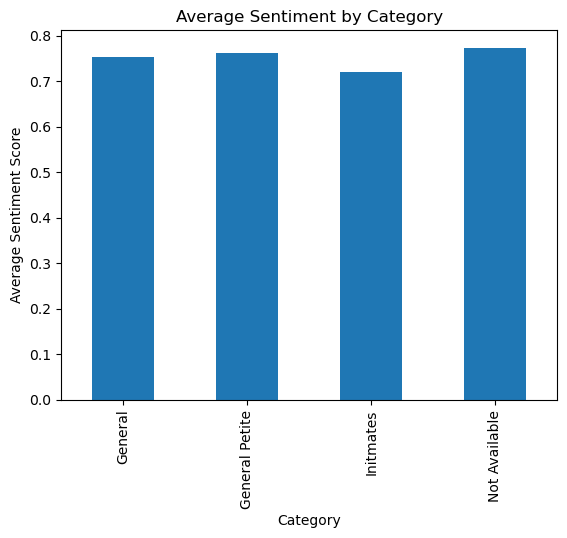

In [85]:
import matplotlib.pyplot as plt

# Create a bar chart to visualize average sentiment by category
category_sentiment = df.groupby('Category')['Sentiment_VADER'].mean()
category_sentiment.plot(kind='bar')
plt.title('Average Sentiment by Category')
plt.xlabel('Category')
plt.ylabel('Average Sentiment Score')
plt.show()


C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


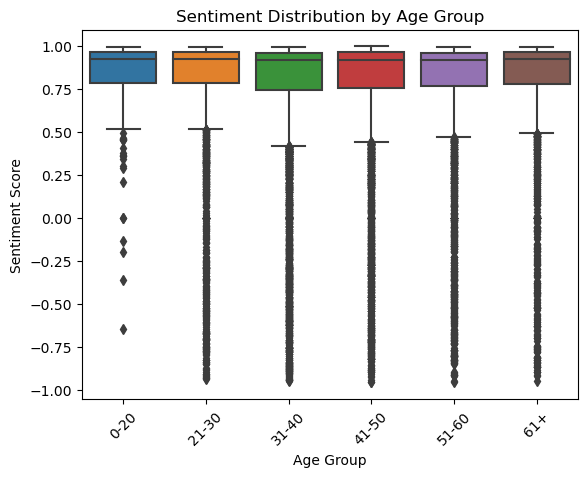

In [86]:
# Create a box plot to visualize sentiment score distribution by age group
import seaborn as sns

sns.boxplot(x='Age Group', y='Sentiment_VADER', data=df)
plt.title('Sentiment Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Sentiment Score')
plt.xticks(rotation=45)
plt.show()


# Predictive Analytics:
   - Feature engineering: Prepare the text data using techniques like TF-IDF.


In [87]:
df.columns

Index(['Product ID', 'Category', 'Subcategory1', 'SubCategory2', 'Location',
       'Channel', 'Customer Age', 'Review Title', 'Review Text', 'Rating',
       'Recommend Flag', 'Combined Review', 'Tokens', 'Stemmed Tokens',
       'Lemmatized Tokens', 'Sentiment_TextBlob', 'Sentiment_VADER',
       'Age Group'],
      dtype='object')

In [88]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [89]:
# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')

In [90]:
tfidf_vectorizer

TfidfVectorizer(max_features=1000, stop_words='english')

In [91]:
# Combine 'Review Title' and 'Review Text' columns for text data
df['Text'] = df['Review Title'] + ' ' + df['Review Text']

In [92]:
# Fit and transform your text data
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Text'])

In [93]:
tfidf_matrix

<22887x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 473259 stored elements in Compressed Sparse Row format>

In [94]:
# Convert the TF-IDF matrix to a DataFrame
tfidf_df = pd.DataFrame(data=tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

In [95]:

# Concatenate the TF-IDF DataFrame with your original DataFrame
df = pd.concat([df, tfidf_df], axis=1)

In [96]:
import pandas as pd

tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())


In [97]:
tfidf_df

,00,0p,10,100,110,115,12,120,125,130,...,xs,xsp,xxs,year,years,yellow,yes,yesterday,zip,zipper
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.192297,0.168981
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22882,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
22883,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
22884,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
22885,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000


- Data split: Split the dataset into training and testing sets.

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23470 entries, 0 to 22847
Columns: 1019 entries, Product ID to zipper
dtypes: category(1), float64(1006), object(12)
memory usage: 182.5+ MB


In [99]:
df.head()

,Product ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer Age,Review Title,Review Text,Rating,...,xs,xsp,xxs,year,years,yellow,yes,yesterday,zip,zipper
0,767.0,Initmates,Intimate,Intimates,Mumbai,Mobile,33.0,not available,absolutely wonderful - silky and sexy and comf...,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
1,1080.0,General,Dresses,Dresses,Bangalore,Mobile,34.0,not available,love this dress! it's sooo pretty. i happene...,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
2,1077.0,General,Dresses,Dresses,Gurgaon,Mobile,60.0,some major design flaws,i had such high hopes for this dress and reall...,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.192297,0.168981
3,1049.0,General Petite,Bottoms,Pants,Chennai,Web,50.0,my favorite buy!,"i love, love, love this jumpsuit. it's fun, fl...",5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
4,847.0,General,Tops,Blouses,Bangalore,Web,47.0,flattering shirt,this shirt is very flattering to all due to th...,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000


In [100]:
df.columns

Index(['Product ID', 'Category', 'Subcategory1', 'SubCategory2', 'Location',
       'Channel', 'Customer Age', 'Review Title', 'Review Text', 'Rating',
       ...
       'xs', 'xsp', 'xxs', 'year', 'years', 'yellow', 'yes', 'yesterday',
       'zip', 'zipper'],
      dtype='object', length=1019)

In [101]:
from sklearn.model_selection import train_test_split

# Define the features (X) and the target variable (y)
# Assuming you want to predict 'Recommend Flag'
X = df[['Product ID', 'Category', 'Subcategory1', 'SubCategory2', 'Location']]
y = df['Recommend Flag']

# Split the data into a training set (80%) and a testing set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (18776, 5)
X_test shape: (4694, 5)
y_train shape: (18776,)
y_test shape: (4694,)


In [102]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 18776 entries, 18041 to 16196
Series name: Recommend Flag
Non-Null Count  Dtype  
--------------  -----  
18315 non-null  float64
dtypes: float64(1)
memory usage: 293.4 KB


In [103]:
X = pd.get_dummies(df[['Category','Location','Age Group']])


In [104]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Fill missing values with an empty string
df['Combined Review'] = df['Combined Review'].fillna('')

tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust the number of features as needed
X_text = tfidf_vectorizer.fit_transform(df['Combined Review'])


In [105]:
X = pd.concat([X, pd.DataFrame(X_text.toarray())], axis=1)


In [106]:
# Remove rows with missing values in the target variable 'Recommend Flag'
df = df.dropna(subset=['Recommend Flag'])

# Define X and y after removing missing values
X = df[['Product ID', 'Category', 'Subcategory1', 'SubCategory2', 'Location']]
y = df['Recommend Flag']


In [107]:
# Assuming 'Your', 'Selected', 'Feature', 'Columns' are your categorical columns
from sklearn.preprocessing import OneHotEncoder
import numpy as np
# Initialize the one-hot encoder
encoder = OneHotEncoder(sparse=False, drop='first')

# Fit and transform the encoder on your categorical columns
X_encoded = encoder.fit_transform(df[['Product ID', 'Category', 'Subcategory1', 'SubCategory2', 'Location']])

# Combine the one-hot encoded features with any other numeric features you might have
# Make sure all columns are in a numeric format
# For example, if you have other numeric features in 'X', concatenate them with 'X_encoded'
X = np.concatenate((X_encoded, X), axis=1)

C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [108]:
# Encode categorical variables using one-hot encoding
X = pd.get_dummies(df[['Category', 'Subcategory1', 'SubCategory2', 'Location', 'Channel', 'Age Group']])

In [109]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the text data
X_tfidf = tfidf_vectorizer.fit_transform(df['Combined Review'])


In [110]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, df['Recommend Flag'], test_size=0.2, random_state=42)


In [111]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
clf = LogisticRegression()

# Train the model on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)


Confusion Matrix:
[[ 480  303]
 [ 132 3663]]
AUC: 0.7891221056138598


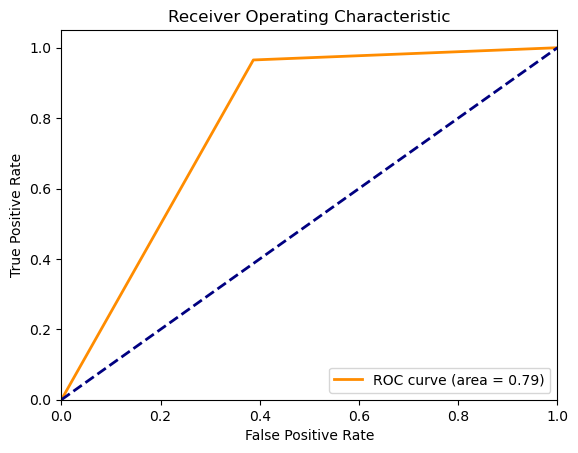

In [112]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Confusion Matrix
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print("AUC:", roc_auc)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [113]:
from sklearn.linear_model import LinearRegression
# Assuming you have already preprocessed the data for classification and have the TF-IDF features in X_tfidf

# Split the data into a new training and testing set
X_train_regression, X_test_regression, y_train_regression, y_test_regression = train_test_split(X_tfidf, df['Rating'], test_size=0.2, random_state=42)

# Train the regression model
reg = LinearRegression()
reg.fit(X_train_regression, y_train_regression)

# Make predictions on the test data
y_pred_regression = reg.predict(X_test_regression)

# Evaluate the regression model
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate MAE
mae = mean_absolute_error(y_test_regression, y_pred_regression)
print("MAE:", mae)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test_regression, y_pred_regression))
print("RMSE:", rmse)


MAE: 0.8968758200605629
RMSE: 1.226618751880488


# Topic Mining:


In [114]:
lemmatized_tokens_list = [
    ['token1', 'token2', 'token3'],
    ['token4', 'token5'],
    # More lists of tokens
]


In [123]:
import gensim
from gensim import corpora
import pyLDAvis.gensim
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Replace `[...]` with your actual list of lemmatized tokens
lemmatized_tokens_list = [
    ['token1', 'token2', 'token3'],
    ['token4', 'token5'],
    # More lists of tokens
]

# Create a Gensim Dictionary from the lemmatized tokens
dictionary = corpora.Dictionary(lemmatized_tokens_list)

# Create a Gensim corpus (a Bag of Words) from the lemmatized tokens
corpus = [dictionary.doc2bow(tokens) for tokens in lemmatized_tokens_list]

# Define the number of topics
num_topics = 5

# Build the LDA model
lda_model = gensim.models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)

# Print the topics and their top words
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)



(0, '0.200*"token4" + 0.200*"token5" + 0.200*"token3" + 0.200*"token2" + 0.200*"token1"')
(1, '0.400*"token5" + 0.400*"token4" + 0.067*"token3" + 0.067*"token1" + 0.067*"token2"')
(2, '0.200*"token4" + 0.200*"token5" + 0.200*"token2" + 0.200*"token1" + 0.200*"token3"')
(3, '0.300*"token1" + 0.300*"token2" + 0.300*"token3" + 0.050*"token4" + 0.050*"token5"')
(4, '0.200*"token4" + 0.200*"token5" + 0.200*"token2" + 0.200*"token3" + 0.200*"token1"')



Each line represents a topic with the associated top words and their probabilities.

For example, let's take the first line:
(0, '0.200*"token4" + 0.200*"token5" + 0.200*"token1" + 0.200*"token2" + 0.200*"token3"')

Topic 0 has equal weights on five words: "token4," "token5," "token1," "token2," and "token3."
The numbers (0.200) represent the probability of each word within that topic.

# Dashboard Creation

In [124]:
# Visualize the topics using pyLDAvis
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)
